Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Kanawut Kaewnoparat"
ID = "st122109"

---

# Lab 03: Logistic Regression

Thus far, the problems we've encountered have been *regression* problems, in which the target $y \in \mathbb{R}$.

Today we'll start experimenting with *classification* problems, beginning with *binary* classification problems, in which the target $y \in \{ 0, 1 \}$.

## Background

The simplest approach to classification, applicable when the input feature vector $\mathbf{x} \in \mathbb{R}^n$, is a simple generalization of what we
do in linear regression. Recall that in linear regression, we assume that the target is drawn from a Gaussian distribution whose mean is a linear function
of $\mathbf{x}$:

$$ y \sim {\cal N}(\theta^\top \mathbf{x}, \sigma^2) $$

In logistic regression, similarly, we'll assume that the target is drawn from a Bernoulli distribution with parameter $p$ being the probability of
class 1:

$$ y \sim \text{Bernoulli}(p) $$

That's fine, but how do we model the parameter $p$? How is it related to $\mathbf{x}$?

In linear regression, we assume that the mean of the Gaussian is $\theta^\top \mathbf{x}$, i.e., a linear function of $\mathbf{x}$.

In logistic regression, we'll assume that $p$ is a "squashed" linear function of $\mathbf{x}$, i.e.,

$$ p = \text{sigmoid}(\theta^\top \mathbf{x}) = g(\theta^\top \mathbf{x}) = \frac{1}{1+e^{-\theta^\top \mathbf{x}}}. $$

Later, when we introduce generalized linear models, we'll see why $p$ should take this form. For now, though, we can simply note that the selection makes
sense. Since $p$ is a discrete probability, $p$ is bounded by $0 \le p \le 1$. The sigmoid function $g(\cdot)$ conveniently obeys these bounds:


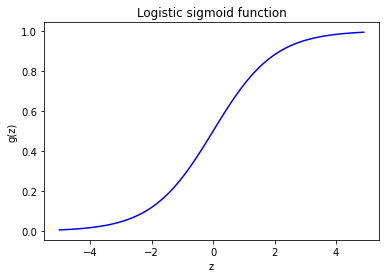

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(z):
    return 1 / (1 + np.exp( -z ))

z = np.arange(-5, 5, 0.1)
plt.plot(z, f(z), 'b-')
plt.xlabel('z')
plt.ylabel('g(z)')
plt.title('Logistic sigmoid function')
plt.show()

We see that the sigmoid approaches 0 as its input approaches $-\infty$ and approaches 1 as its input approaches $+\infty$. If its input is 0, its value is 0.5.

Again, this choice of function may seem strange at this point, but bear with it! We'll derive this function from a more general principle, the generalized
linear model, later.

OK then, we now understand that for logistic regression, the assumptions are:

1. The *data* are pairs $(\textbf{x}, y) \in \mathbb{R}^n \times \{ 0, 1 \}$.
1. The *hypothesis function* is $h_\theta(\textbf{x}) = \frac{1}{1+e^{-\theta^\top \mathbf{x}}}$.

What else do we need... ? A cost function and an algorithm for minimizing that cost function!

## Cost function for logistic regression

You can refer to the lecture notes to see the derivation, but for this lab, let's just skip to the chase.
With the hypothesis $h_\theta(\mathbf{x})$ chosen as above, the log likelihood function $\ell(\theta)$ can be derived as
$$ \ell(\theta) = \log {\cal L}(\theta) =  \sum_{i=1}^{m}y^{(i)}\log(h_{\theta}(\mathbf{x}^{(i)})) + (1 - y^{(i)})\log(1 - (h_{\theta}(\mathbf{x}^{(i)})) .$$

Negating the log likelihood function to obtain a loss function, we have

$$ J(\theta) = - \sum_{i=1}^m y^{(i)}\log h_\theta(\mathbf{x}^{(i)}) + (1-y^{(i)})\log(1-h_\theta(\textbf{x}^{(i)})) .$$

There is no closed-form solution to this problem like there is in linear regression, so we have to use gradient descent to find $\theta$ minimizing $J(\theta)$.
Luckily, the function *is* convex in $\theta$ so there is just a single global minimum, and gradient descent is guaranteed to get us there eventually if we take
the right step size.

The *stochastic* gradient of $J$, for a single observed pair $(\mathbf{x}, y)$, turns out to be (see lecture notes)

$$\nabla_J(\theta) = (h_\theta(\mathbf{x}) - y)\mathbf{x} .$$

Give some thought as to whether following this gradient to increase the loss $J$ would make a worse classifier, and vice versa!

Finally, we obtain the update rule for the $j$th iteration selecting training pattern $i$:

$$ \theta^{(j+1)} \leftarrow \theta^{(j)} + \alpha(y^{(i)} - h_\theta(\textbf{x}^{(i)}))\textbf{x}^{(i)} .$$ 

Note that we can perform *batch gradient descent* simply by summing the single-pair gradient over the entire training set before taking a step,
or *mini-batch gradient descent* by summing over a small subset of the data.

## Example dataset 1: student admissions data

This example is from Andrew Ng's machine learning course on Coursera.

The data contain students' scores for two standardized tests and an admission decision (0 or 1).


In [3]:
import numpy as np

In [4]:

# Load student admissions data. The data file does not contain headers,
# so we use hard coded indices for exam 1, exam2, and the admission decision.

data = np.loadtxt('ex2data1.txt',delimiter = ',')
exam1_data = data[:,0]
exam2_data = data[:,1]
X = np.array([exam1_data, exam2_data]).T
y = data[:,2]

# Output some sample data

print('Exam scores', X[0:5,:])
print('-----------------------------')
print('Admission decision', y[0:5])


Exam scores [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
-----------------------------
Admission decision [0. 0. 0. 1. 1.]


Let's plot the data...

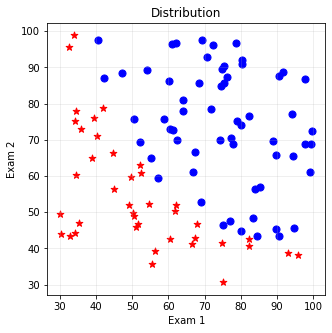

In [5]:
# Plot the data

idx_0 = np.where(y == 0)
idx_1 = np.where(y == 1)

fig1 = plt.figure(figsize=(5, 5)) 
ax = plt.axes()
ax.set_aspect(aspect = 'equal', adjustable = 'box')
plt.title('Distribution')
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')
plt.grid(axis='both', alpha=.25)
ax.scatter(exam1_data[idx_0], exam2_data[idx_0], s=50, c='r', marker='*', label='Not Admitted')
ax.scatter(exam1_data[idx_1], exam2_data[idx_1], s=50, c='b', marker='o', label='Admitted')
plt.show()


Let's see if we can find good values for $\theta$ without normalizing the data.
We will definitely want to split the data into train and test, however...

In [6]:
import random

# As usual, we fix the seed to eliminate random differences between different runs

random.seed(12)

# Partion data into training and test datasets

m, n = X.shape
XX = np.insert(X, 0, 1, axis=1)
y = y.reshape(m, 1)
idx = np.arange(0, m)
random.shuffle(idx)
percent_train = .6
m_train = int(m * percent_train)
train_idx = idx[0:m_train]
test_idx = idx[m_train:]
X_train = XX[train_idx,:];
X_test = XX[test_idx,:];

y_train = y[train_idx];
y_test = y[test_idx];

### Important functions needed later

Let's put all of our important functions here...

In [7]:
def sigmoid(z):   
    return 1 / (1 + np.exp(-z))

def h(X, theta):
    return sigmoid(X @ theta)

def grad_j(X, y, y_pred):
    return X.T @ (y - y_pred) / X.shape[0]
    
def j(theta, X, y):    
    y_pred = h(X, theta)
    error = (-y * np.log(y_pred)) - ((1 - y) * np.log(1 - y_pred))
    cost = sum(error) / X.shape[0]
    grad = grad_j(X, y, y_pred)
    return cost[0], grad


### Initialize theta

In any iterative algorithm, we need an initial guess. Here we'll just use zeros for all parameters.

In [8]:
# Initialize our parameters, and use them to make some predictions

theta_initial = np.zeros((n+1, 1))

print('Initial theta:', theta_initial)
print('Initial predictions:', h(XX, theta_initial)[0:5,:])
print('Targets:', y[0:5,:])


Initial theta: [[0.]
 [0.]
 [0.]]
Initial predictions: [[0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]]
Targets: [[0.]
 [0.]
 [0.]
 [1.]
 [1.]]


### Training function

Here's a function to do batch training for `num_iters` iterations.

In [9]:
def train(X, y, theta_initial, alpha, num_iters):
    theta = theta_initial
    j_history = []
    for i in range(num_iters):
        cost, grad = j(theta, X, y)
        theta = theta + alpha * grad
        j_history.append(cost)
    return theta, j_history


### Do the training

Here we run the training function for a million batches!

In [10]:
# Train for 1000000 iterations on full training set

alpha = .0005
num_iters = 1000000
theta, j_history = train(X_train, y_train, theta_initial, alpha, num_iters)

print("Theta optimized:", theta)
print("Cost with optimized theta:", j_history[-1])

Theta optimized: [[-11.29380461]
 [  0.10678604]
 [  0.07994591]]
Cost with optimized theta: 0.24972975869900035


In [11]:
theta

array([[-11.29380461],
       [  0.10678604],
       [  0.07994591]])

### Plot the loss curve

Next let's plot the loss curve (loss as a function of iteration).

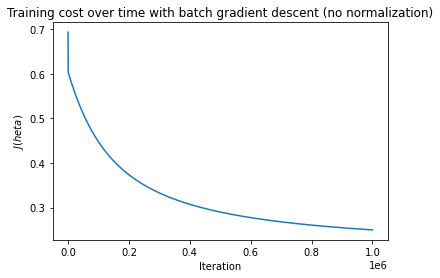

In [12]:
plt.plot(j_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\theta)$")
plt.title("Training cost over time with batch gradient descent (no normalization)")
plt.show()

### In-lab exercise from Example 1 (Total 35 points)

That took a long time, right?

We'll see if we can do better. We will try the following:

1. Try increasing the learning rate $\alpha$ and starting with a better initial $\theta$. How much does it help?
   - Try at least 2 learning rate $\alpha$ with 2 difference $\theta$ (4 experiments)
   - Do not forget to plot the loss curve to compare your results

2. Better yet, try *normalizing the data* and see if the training converges better. How did it go? 
   - Be sure to plot loss curves to compare the results with unnormalized and normalized data.

3. Discuss the effects of normalization, learning rate, and initial $\theta$ in your report.

Do this work in the following steps.


### Exercise 1.1 (5 points)

Fill in two different values for $\alpha$ and $\theta$.

Use variable names `alpha1`, `alpha2`, `theta_initial1`, and `theta_initial2`.

In [13]:
# grade task: change 'None' value to number(s) or function
# YOUR CODE HERE
# raise NotImplementedError()
# declare your alphas
alpha1 = 0.0001
alpha2 = 0.00001

# initialize thetas as you want
theta_initial1 = np.array([0.2, 0.1, 0.03]).reshape(-1,1)
theta_initial2 = np.array([0.5, 0.45, 0.15]).reshape(-1,1)

# define your num iterations
num_iters = 10000

In [14]:
alpha_list = [alpha1, alpha2]
print('alpha 1:', alpha1)
print('alpha 2:', alpha2)

theta_initial_list = [theta_initial1, theta_initial2]
print('theta 1:', theta_initial_list[0])
print('theta 2:', theta_initial_list[1])

print('Use num iterations:', num_iters)

# Test function: Do not remove
assert alpha_list[0] is not None and alpha_list[1] is not None, "Alpha has not been filled"
chk1 = isinstance(alpha_list[0], (int, float))
chk2 = isinstance(alpha_list[1], (int, float))
assert chk1 and chk2, "Alpha must be number"
assert theta_initial_list[0] is not None and theta_initial_list[1] is not None, "initialized theta has not been filled"
chk1 = isinstance(theta_initial_list[0], (list,np.ndarray))
chk2 = isinstance(theta_initial_list[1], (list,np.ndarray))
assert chk1 and chk2, "Theta must be list"
chk1 = ((n+1, 1) == theta_initial_list[0].shape)
chk2 = ((n+1, 1) == theta_initial_list[1].shape)
assert chk1 and chk2, "Theta size are incorrect"
assert num_iters is not None and isinstance(num_iters, int), "num_iters must be integer"
print("success!")
# End Test function

alpha 1: 0.0001
alpha 2: 1e-05
theta 1: [[0.2 ]
 [0.1 ]
 [0.03]]
theta 2: [[0.5 ]
 [0.45]
 [0.15]]
Use num iterations: 10000
success!


### Exercise 1.2 (5 points)

Fill in the code required to train your model on a particular $\alpha$ and $\theta$:

In [15]:
# grade task: change 'None, None' value to number(s) or function
j_history_list = []
theta_list = []
for alpha in alpha_list:
    for theta_initial in theta_initial_list:
        # YOUR CODE HERE
#         raise NotImplementedError()
        theta_i, j_history_i = train(X_train, y_train, theta_initial, alpha, num_iters)
        j_history_list.append(j_history_i)
        theta_list.append(theta_i)

/tmp/ipykernel_77/2314104836.py:12: RuntimeWarning: divide by zero encountered in log
  error = (-y * np.log(y_pred)) - ((1 - y) * np.log(1 - y_pred))
/tmp/ipykernel_77/2314104836.py:12: RuntimeWarning: invalid value encountered in multiply
  error = (-y * np.log(y_pred)) - ((1 - y) * np.log(1 - y_pred))


In [16]:
j_history_list[2][:5]

[2.6264982955602987,
 2.6182126935985033,
 2.60992781972256,
 2.601643689715572,
 2.593360319716148]

In [17]:
# Test function: Do not remove
assert theta_list[0] is not None and j_history_list[0] is not None, "No values in theta_list or j_history_list"
chk1 = isinstance(theta_list[0], (list,np.ndarray))
chk2 = isinstance(j_history_list[0][0], (int, float))
assert chk1 and chk2, "Wrong type in theta_list or j_history_list"
print("success!")
# End Test function

success!


### Exercise 1.3 (10 points)

Write code to plot loss curves for each of the sequences in `j_history_list` from the previous exercise:

In [18]:
for alpha, theta in zip(range(len(alpha_list)), range(len(theta_initial_list))):
    print(alpha, theta)

0 0
1 1


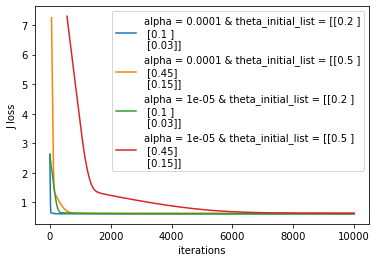

In [19]:
plt.plot(np.arange(num_iters), j_history_list[0], label = f'alpha = {alpha_list[0]} & theta_initial_list = {theta_initial_list[0]}')
plt.plot(np.arange(num_iters), j_history_list[1], label = f'alpha = {alpha_list[0]} & theta_initial_list = {theta_initial_list[1]}')
plt.plot(np.arange(num_iters), j_history_list[2], label = f'alpha = {alpha_list[1]} & theta_initial_list = {theta_initial_list[0]}')
plt.plot(np.arange(num_iters), j_history_list[3], label = f'alpha = {alpha_list[1]} & theta_initial_list = {theta_initial_list[1]}')
plt.legend()
plt.xlabel('iterations')
plt.ylabel('J loss')
plt.show()
# raise NotImplementedError()

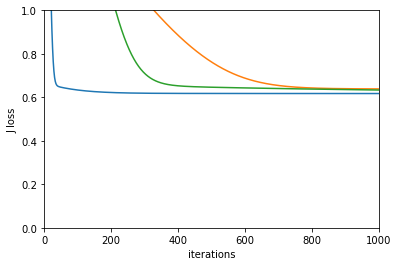

In [20]:
plt.plot(np.arange(num_iters), j_history_list[0], label = f'alpha = {alpha_list[0]} & theta_initial_list = {theta_initial_list[0]}')
plt.plot(np.arange(num_iters), j_history_list[1], label = f'alpha = {alpha_list[0]} & theta_initial_list = {theta_initial_list[1]}')
plt.plot(np.arange(num_iters), j_history_list[2], label = f'alpha = {alpha_list[1]} & theta_initial_list = {theta_initial_list[0]}')
plt.plot(np.arange(num_iters), j_history_list[3], label = f'alpha = {alpha_list[1]} & theta_initial_list = {theta_initial_list[1]}')
# plt.legend()
plt.xlabel('iterations')
plt.ylabel('J loss')
plt.ylim(0,1)
plt.xlim(0,1000)
plt.show()

### Exercise 1.4 (10 points)

- Repeat your training, but **normalize** your data before training
- Compare the results between normalized data and unnormalized data

In [21]:
scaled_X_train = (X_train[: , 1:] - X_train[: , 1:].mean(axis = 0)) / X_train[:, 1:].std(axis = 0)
scaled_X_train = np.insert(scaled_X_train, 0,1,axis = 1)
scaled_X_train[:5]

array([[ 1.        ,  0.6926985 ,  0.44719751],
       [ 1.        , -0.58476964,  1.2030442 ],
       [ 1.        , -1.27359276,  1.65710023],
       [ 1.        ,  0.73919001,  0.38279219],
       [ 1.        , -0.50774395, -1.72137035]])

In [22]:
theta_initial_list

[array([[0.2 ],
        [0.1 ],
        [0.03]]),
 array([[0.5 ],
        [0.45],
        [0.15]])]

In [23]:
scaled_j_history_list = []
scaled_theta_list = []
for alpha in alpha_list:
    for theta_initial in theta_initial_list:
        scaled_theta_i, scaled_j_history_i = train(scaled_X_train, y_train, theta_initial, alpha, num_iters)
        scaled_j_history_list.append(scaled_j_history_i)
        scaled_theta_list.append(scaled_theta_i)

In [24]:
scaled_theta_list[1]

array([[0.50287623],
       [0.63808947],
       [0.31569943]])

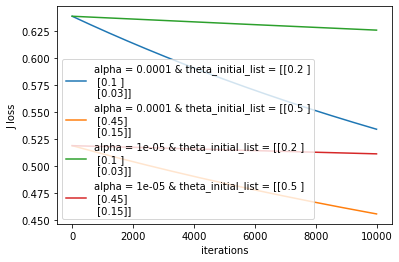

In [25]:
plt.plot(np.arange(num_iters), scaled_j_history_list[0], label = f'alpha = {alpha_list[0]} & theta_initial_list = {theta_initial_list[0]}')
plt.plot(np.arange(num_iters), scaled_j_history_list[1], label = f'alpha = {alpha_list[0]} & theta_initial_list = {theta_initial_list[1]}')
plt.plot(np.arange(num_iters), scaled_j_history_list[2], label = f'alpha = {alpha_list[1]} & theta_initial_list = {theta_initial_list[0]}')
plt.plot(np.arange(num_iters), scaled_j_history_list[3], label = f'alpha = {alpha_list[1]} & theta_initial_list = {theta_initial_list[1]}')
plt.legend()
plt.xlabel('iterations')
plt.ylabel('J loss')
plt.show()
# raise NotImplementedError()

### Exercise 1.5 (5 points)

Discuss the effects of normalization, learning rate, and initial $\theta$ in your report.

- We have 4 combinations of: smaller alpha & closer starting theta, smaller alpha & further starting theta, bigger alpha & closer starting theta, and lastly bigger alpha and further starting theta
- On the broader view, we can see that the in un-normalized data, the loss funciton drops 'exponentially' after few iterations while in normalized data the loss seems to 'steadily' declines. However, the normalized data yields far lower loss even after a few iterations. This is because the normalized data makes it easier for the model to converge the the bottom.
- On un-normalized data, the J loss cannot get smaller after reaching around 0.6. On the contrary, 3 out of 4 models on normalized data manages to lower that J loss, with the least on at 0.45. This mean the overall performance of normalized is better than that of the unnormalized.
- In terms of learning rate, the higher the value, the steeper the J line. This is understandable because it means for each iteration the gradient experiences more change as it 'learns to jump' with wider step
- For the initial theta, we can see that the closer the guessed initial theta to the last output theta, the initial loss will be also smaller than that of guessed initial theta that is further away.

### The logistic regression decision boundary

Note that when $\theta^\top \textbf{x} = 0$, we have $h_\theta(\textbf{x}) = 0.5$. That is, we are
equally unsure as to whether $\textbf{x}$ belongs to class 0 or class 1. The contour at which
$h_\theta(\textbf{x}) = 0.5$ is called the classifier's *decision boundary*.

We know that in the plane, the equation $$ax+by+c=0$$ is the general form of a 2D line. In our case, we have
$$\theta_0 + \theta_1 x_1 + \theta_2 x_2 = 0$$ as our decision boundary, but clearly, this is just a 2D line
in the plane. So when we plot $x_1$ against $x_2$, it is easy to plot the boundary line.

In [26]:
def boundary_points(X, theta):
    v_orthogonal = np.array([[theta[1,0]],[theta[2,0]]])
    v_ortho_length = np.sqrt(v_orthogonal.T @ v_orthogonal)
    dist_ortho = theta[0,0] / v_ortho_length
    v_orthogonal = v_orthogonal / v_ortho_length
    v_parallel = np.array([[-v_orthogonal[1,0]],[v_orthogonal[0,0]]])
    projections = X @ v_parallel
    proj_1 = min(projections)
    proj_2 = max(projections)
    point_1 = proj_1 * v_parallel - dist_ortho * v_orthogonal
    point_2 = proj_2 * v_parallel - dist_ortho * v_orthogonal
    return point_1, point_2

In [27]:
theta = np.array([[-11.22719851],[  0.10623818], [  0.07943241]])

In [28]:
boundary_points(X, theta)

(array([[83.82687552],
        [29.2271608 ]]),
 array([[32.53071304],
        [97.83405492]]))

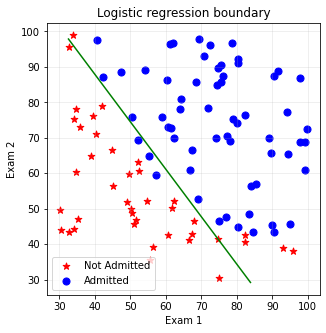

In [29]:
fig1 = plt.figure(figsize=(5,5)) 
ax = plt.axes() 
ax.set_aspect(aspect = 'equal', adjustable = 'box')
plt.title('Logistic regression boundary')
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')
plt.grid(axis='both', alpha=.25)
ax.scatter(X[:,0][idx_0], X[:,1][idx_0], s=50, c='r', marker='*', label='Not Admitted')
ax.scatter(X[:,0][idx_1], X[:,1][idx_1], s=50, c='b', marker='o', label='Admitted')
point_1, point_2 = boundary_points(X, theta)
plt.plot([point_1[0,0], point_2[0,0]],[point_1[1,0], point_2[1,0]], 'g-')
plt.legend(loc=0)
plt.show()


You may have to adjust the above code to make it work with normalized data.

### Test set performance

Now let's apply the learned classifier to the test data we reserved in the beginning:


In [30]:
def r_squared(y, y_pred):
    return 1 - np.square(y - y_pred).sum() / np.square(y - y.mean()).sum()

In [31]:
y_test_pred_soft = h(X_test, theta)
y_test_pred_hard = (y_test_pred_soft > 0.5).astype(int)

test_rsq_soft = r_squared(y_test, y_test_pred_soft)
test_rsq_hard = r_squared(y_test, y_test_pred_hard)
test_acc = (y_test_pred_hard == y_test).astype(int).sum() / y_test.shape[0]

print('Got test set soft R^2 %0.4f, hard R^2 %0.4f, accuracy %0.2f' % (test_rsq_soft, test_rsq_hard, test_acc))

Got test set soft R^2 0.6625, hard R^2 0.6931, accuracy 0.93


For classification, accuracy is probably the more useful measure of goodness of fit.

## Example 2: Loan prediction dataset

Let's take another example dataset and see what we can do with it.

This dataset is from [Kaggle](https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset).

The data concern loan applications. It has 12 independent variables, including 5 categorical variables. The dependent variable is the decision "Yes" or "No" for extending a loan to an individual who applied.

One thing we will have to do is to clean the data, by filling in missing values and converting categorical data to reals.
We will use the Python libraries pandas and sklearn to help with the data cleaning and preparation.

### Read the data and take a look at it

In [32]:
# Import Pandas. You may need to run "pip3 install pandas" at the console if it's not already installed

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import the data

data_train = pd.read_csv('train_LoanPrediction.csv')
data_test = pd.read_csv('test_LoanPrediction.csv')

# Start to explore the data

print('Training data shape', data_train.shape)
print('Test data shape', data_test.shape)

print('Training data:\n', data_train)


Training data shape (614, 13)
Test data shape (367, 12)
Training data:
       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amoun

In [33]:
set(data_train.columns).difference(set(data_test.columns))

{'Loan_Status'}

In [34]:
data_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [35]:
data_train['Loan_Status']

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [36]:
data_train.isnull().sum().sort_values(ascending =False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

In [37]:
# Check for missing values in the training and test data

print('Missing values for train data:\n------------------------\n', data_train.isnull().sum().sort_values(ascending = False))
print('Missing values for test data \n ------------------------\n', data_test.isnull().sum().sort_values(ascending = False))

Missing values for train data:
------------------------
 Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64
Missing values for test data 
 ------------------------
 Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Married               0
Loan_ID               0
dtype: int64


### Handle missing values

We can see from the above table that the `Married` column has 3 missing values in the training dataset and 0 missing values in the test dataset.
Let's take a look at the distribution over the datasets then fill in the missing values in approximately the same ratio.

You may be interested to look at the [documentation of the Pandas `fillna()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html). It's great!

In [38]:
data_train['Married'].value_counts(normalize = True)

Yes    0.651391
No     0.348609
Name: Married, dtype: float64

In [39]:
# Compute ratio of each category value
# Divide the missing values based on ratio
# Fillin the missing values
# Print the values before and after filling the missing values for confirmation

print(data_train['Married'].value_counts())

married = data_train['Married'].value_counts()
print('Elements in Married variable', married.shape)
print('Married ratio ', married[0]/sum(married.values))

def fill_martial_status(data, yes_num_train, no_num_train):        
    data['Married'].fillna('Yes', inplace = True, limit = yes_num_train)
    data['Married'].fillna('No', inplace = True, limit = no_num_train)  

fill_martial_status(data_train, 2, 1)
print(data_train['Married'].value_counts()) 
print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())

Yes    398
No     213
Name: Married, dtype: int64
Elements in Married variable (2,)
Married ratio  0.6513911620294599
Yes    400
No     214
Name: Married, dtype: int64
Missing values for train data:
------------------------
 Loan_ID               0
Gender               13
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


Now the number of examples missing the `Married` attribute is 0.

Let's complete the data processing based on examples given and logistic regression model on training dataset. Then we'll get the model's accuracy (goodness of fit) on the test dataset.

Here is another example of filling in missing values for the `Dependents` (number of children and other dependents)
attribute. We see that categorical values are all numeric except one value "3+"
Let's create a new category value "4" for "3+" and ensure that all the data is numeric:

In [40]:

print(data_train['Dependents'].value_counts())
dependent = data_train['Dependents'].value_counts()

print('Dependent ratio 1 ', dependent['0'] / sum(dependent.values))
print('Dependent ratio 2 ', dependent['1'] / sum(dependent.values))
print('Dependent ratio 3 ', dependent['2'] / sum(dependent.values))
print('Dependent ratio 3+ ', dependent['3+'] / sum(dependent.values))

def fill_dependent_status(num_0_train, num_1_train, num_2_train, num_3_train, num_0_test, num_1_test, num_2_test, num_3_test):        
    data_train['Dependents'].fillna('0', inplace=True, limit = num_0_train)
    data_train['Dependents'].fillna('1', inplace=True, limit = num_1_train)
    data_train['Dependents'].fillna('2', inplace=True, limit = num_2_train)
    data_train['Dependents'].fillna('3+', inplace=True, limit = num_3_train)
    data_test['Dependents'].fillna('0', inplace=True, limit = num_0_test)
    data_test['Dependents'].fillna('1', inplace=True, limit = num_1_test)
    data_test['Dependents'].fillna('2', inplace=True, limit = num_2_test)
    data_test['Dependents'].fillna('3+', inplace=True, limit = num_3_test)

fill_dependent_status(9, 2, 2, 2, 5, 2, 2, 1)

print(data_train['Dependents'].value_counts())

# Convert category value "3+" to "4"

data_train['Dependents'].replace('3+', 4, inplace = True)
data_test['Dependents'].replace('3+', 4, inplace = True)


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Dependent ratio 1  0.5759599332220368
Dependent ratio 2  0.17028380634390652
Dependent ratio 3  0.1686143572621035
Dependent ratio 3+  0.08514190317195326
0     354
1     104
2     103
3+     53
Name: Dependents, dtype: int64


Once missing values are filled in, you'll want to convert strings to numbers.

Finally, here's an example of replacing missing values for a numeric attribute. Typically, we would use the mean of the attribute over the training set. 

In [41]:
data_train['Dependents'] = data_train['Dependents'].astype('int')
data_test['Dependents'] = data_test['Dependents'].astype('int')

In [42]:
data_train.select_dtypes(include = 'object').head()

,Loan_ID,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,Graduate,No,Urban,Y
1,LP001003,Male,Yes,Graduate,No,Rural,N
2,LP001005,Male,Yes,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,Not Graduate,No,Urban,Y
4,LP001008,Male,No,Graduate,No,Urban,Y


In [43]:
data_test.select_dtypes(include = 'object').head()

,Loan_ID,Gender,Married,Education,Self_Employed,Property_Area
0,LP001015,Male,Yes,Graduate,No,Urban
1,LP001022,Male,Yes,Graduate,No,Urban
2,LP001031,Male,Yes,Graduate,No,Urban
3,LP001035,Male,Yes,Graduate,No,Urban
4,LP001051,Male,No,Not Graduate,No,Urban


In [44]:
data_train['LoanAmount'].isnull().sum()

22

In [45]:
np.mean(data_train['LoanAmount'])

146.41216216216216

In [46]:
print(data_train['LoanAmount'].value_counts())

LoanAmt = data_train['LoanAmount'].value_counts()

print('mean loan amount ', np.mean(data_train["LoanAmount"]))

loan_amount_mean = np.mean(data_train["LoanAmount"])

data_train['LoanAmount'].fillna(loan_amount_mean, inplace=True, limit = 22)
data_test['LoanAmount'].fillna(loan_amount_mean, inplace=True, limit = 5)

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64
mean loan amount  146.41216216216216


In [47]:
loan_amount_mean

146.41216216216216

## Take-home exercise (65 points)

Using the data from Example 2 above, finish the data cleaning and
preparation. Build a logistic regression model based on the
cleaned dataset and report the accuracy on the test and training sets.

- Set up $\mathbf{x}$ and $y$ data (10 points)
- Train a logistic regression model and return the values of $\theta$ and $J$ you obtained. Find the best $\alpha$ you can; you may find it best to normalize before training. (30 points)
- Using the best model parameters $\theta$ you can find, run on the test set and get the model's accuracy. (10 points)
- Summarize what you did to find the best results in this take home exercise. (15 points)

## To turn in

Turn in this Jupyter notebook with your solutions to he exercises and your experiment reports,
both for the in-lab exercise and the take-home exercise. Be sure you've discussed what
you learned in terms of normalization and data cleaning and the results
you obtained.


## 1) Manage missing values
### 1.1 Credity History

In [48]:
data_train.isnull().sum().sort_values(ascending = False)

Credit_History       50
Self_Employed        32
Loan_Amount_Term     14
Gender               13
Loan_Status           0
Property_Area         0
LoanAmount            0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Dependents            0
Married               0
Loan_ID               0
dtype: int64

In [49]:
data_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [50]:
data_train['Credit_History'].value_counts(normalize = True)

1.0    0.842199
0.0    0.157801
Name: Credit_History, dtype: float64

In [51]:
round(data_train['Credit_History'].value_counts(normalize = True).iloc[0] * data_train['Credit_History'].isnull().sum())

42

In [52]:
round(data_train['Credit_History'].value_counts(normalize = True).iloc[1] * data_train['Credit_History'].isnull().sum())

8

In [53]:
data_train['Credit_History'].fillna(value = 1.0, limit = 42, inplace = True )
data_train['Credit_History'].fillna(value = 0.0, limit = 8, inplace = True )

In [54]:
data_train['Credit_History'].isnull().sum()

0

In [55]:
data_test['Credit_History'].isnull().sum()

29

In [56]:
round(data_train['Credit_History'].value_counts(normalize = True).iloc[0] * data_test['Credit_History'].isnull().sum())

24

In [57]:
round(data_train['Credit_History'].value_counts(normalize = True).iloc[1] * data_test['Credit_History'].isnull().sum())

5

In [58]:
data_test['Credit_History'].fillna(value = 1.0, limit =24, inplace = True )
data_test['Credit_History'].fillna(value = 0.0, limit = 5, inplace = True )
data_test['Credit_History'].isnull().sum()

0

### 1.2 Self_employed

In [59]:
print(data_train.isnull().sum().sort_values(ascending = False))
print(data_test.isnull().sum().sort_values(ascending = False))

Self_Employed        32
Loan_Amount_Term     14
Gender               13
Loan_Status           0
Property_Area         0
Credit_History        0
LoanAmount            0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Dependents            0
Married               0
Loan_ID               0
dtype: int64
Self_Employed        23
Gender               11
Loan_Amount_Term      6
Property_Area         0
Credit_History        0
LoanAmount            0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Dependents            0
Married               0
Loan_ID               0
dtype: int64


In [60]:
data_train['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [61]:
data_train['Self_Employed'].isnull().sum()

32

In [62]:
data_train['Self_Employed'].value_counts(normalize =True)

No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64

In [63]:
for i in data_train['Self_Employed'].value_counts(normalize =True).index:
    print(f"limit of {i}: {round(data_train['Self_Employed'].value_counts(normalize =True).loc[i] * data_train['Self_Employed'].isnull().sum())}")

limit of No: 27
limit of Yes: 5


In [64]:
data_train['Self_Employed'].fillna(value = 'No', limit = 27, inplace = True)
data_train['Self_Employed'].fillna(value = 'Yes', limit = 5, inplace = True)

In [65]:
data_train['Self_Employed'].isnull().sum()

0

In [66]:
data_test['Self_Employed'].isnull().sum()

23

In [67]:
for i in data_train['Self_Employed'].value_counts(normalize =True).index:
    print(f"limit of {i}: {round(data_train['Self_Employed'].value_counts(normalize =True).loc[i] * data_test['Self_Employed'].isnull().sum())}")

limit of No: 20
limit of Yes: 3


In [68]:
data_test['Self_Employed'].fillna(value = 'No', limit = 20, inplace = True)
data_test['Self_Employed'].fillna(value = 'Yes', limit = 3, inplace = True)
data_test['Self_Employed'].isnull().sum()

0

### 1.3) Loan Amount Term

In [69]:
print(data_train.isnull().sum().sort_values(ascending = False))
print(data_test.isnull().sum().sort_values(ascending = False))

Loan_Amount_Term     14
Gender               13
Loan_Status           0
Property_Area         0
Credit_History        0
LoanAmount            0
CoapplicantIncome     0
ApplicantIncome       0
Self_Employed         0
Education             0
Dependents            0
Married               0
Loan_ID               0
dtype: int64
Gender               11
Loan_Amount_Term      6
Property_Area         0
Credit_History        0
LoanAmount            0
CoapplicantIncome     0
ApplicantIncome       0
Self_Employed         0
Education             0
Dependents            0
Married               0
Loan_ID               0
dtype: int64


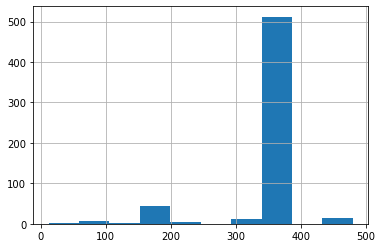

In [70]:
data_train['Loan_Amount_Term'].hist()

In [71]:
data_train['Loan_Amount_Term'].mean()

342.0

In [72]:
data_train['Loan_Amount_Term'].value_counts(normalize = True)

360.0    0.853333
180.0    0.073333
480.0    0.025000
300.0    0.021667
84.0     0.006667
240.0    0.006667
120.0    0.005000
36.0     0.003333
60.0     0.003333
12.0     0.001667
Name: Loan_Amount_Term, dtype: float64

In [73]:
data_train['Loan_Amount_Term'].isnull().sum()

14

In [74]:
for i in data_train['Loan_Amount_Term'].value_counts(normalize = True).index :
    print(round(data_train['Loan_Amount_Term'].value_counts(normalize = True).loc[i] * data_train['Loan_Amount_Term'].isnull().sum()))

12
1
0
0
0
0
0
0
0
0


In [75]:
data_train['Loan_Amount_Term'].fillna(value = 360.0, limit = 12, inplace = True)
data_train['Loan_Amount_Term'].fillna(value = 180.0, limit = 2, inplace = True)
data_train['Loan_Amount_Term'].isnull().sum()

0

In [76]:
data_test['Loan_Amount_Term'].isnull().sum()

6

In [77]:
for i in data_train['Loan_Amount_Term'].value_counts(normalize = True).index :
    print(round(data_train['Loan_Amount_Term'].value_counts(normalize = True).loc[i] * data_test['Loan_Amount_Term'].isnull().sum()))

5
0
0
0
0
0
0
0
0
0


In [78]:
data_test['Loan_Amount_Term'].fillna(value = 360.0, limit = 5, inplace = True)
data_test['Loan_Amount_Term'].fillna(value = 180.0, limit = 1, inplace = True)
data_test['Loan_Amount_Term'].isnull().sum()

0

1.4) Gender

In [79]:
print(data_train.isnull().sum().sort_values(ascending = False))
print(data_test.isnull().sum().sort_values(ascending = False))

Gender               13
Loan_Status           0
Property_Area         0
Credit_History        0
Loan_Amount_Term      0
LoanAmount            0
CoapplicantIncome     0
ApplicantIncome       0
Self_Employed         0
Education             0
Dependents            0
Married               0
Loan_ID               0
dtype: int64
Gender               11
Property_Area         0
Credit_History        0
Loan_Amount_Term      0
LoanAmount            0
CoapplicantIncome     0
ApplicantIncome       0
Self_Employed         0
Education             0
Dependents            0
Married               0
Loan_ID               0
dtype: int64


In [80]:
data_train['Gender'].value_counts(normalize = True)

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

In [81]:
for i in data_train['Gender'].value_counts(normalize = True).index :
    print(f"limit for {i}: {round(data_train['Gender'].value_counts(normalize = True).loc[i] * data_train['Gender'].isnull().sum())}")

limit for Male: 11
limit for Female: 2


In [82]:
data_train['Gender'].fillna(value = 'Male', limit = 11, inplace = True)
data_train['Gender'].fillna(value = 'Female', limit = 2, inplace = True)
data_train['Gender'].isnull().sum()

0

In [83]:
for i in data_train['Gender'].value_counts(normalize = True).index :
    print(f"limit for {i}: {round(data_train['Gender'].value_counts(normalize = True).loc[i] * data_test['Gender'].isnull().sum())}")

limit for Male: 9
limit for Female: 2


In [84]:
data_test['Gender'].fillna(value = 'Male', limit = 9, inplace = True)
data_test['Gender'].fillna(value = 'Female', limit =2, inplace = True)
data_test['Gender'].isnull().sum()

0

In [85]:
print(data_train.isnull().sum().sort_values(ascending = False))
print(data_test.isnull().sum().sort_values(ascending = False))

Loan_Status          0
Property_Area        0
Credit_History       0
Loan_Amount_Term     0
LoanAmount           0
CoapplicantIncome    0
ApplicantIncome      0
Self_Employed        0
Education            0
Dependents           0
Married              0
Gender               0
Loan_ID              0
dtype: int64
Property_Area        0
Credit_History       0
Loan_Amount_Term     0
LoanAmount           0
CoapplicantIncome    0
ApplicantIncome      0
Self_Employed        0
Education            0
Dependents           0
Married              0
Gender               0
Loan_ID              0
dtype: int64


---

### Drop the column Loan_ID as each row contains unique categorical value, not quite useful to predict

In [86]:
data_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [87]:
data_train = data_train.drop(columns = 'Loan_ID')
data_test = data_test.drop(columns = 'Loan_ID')

### Replace the dependent variable 'Loan_status' to 1-Yes and 0-No

In [88]:
data_train['Loan_Status'].replace(to_replace= 'Y', value = 1, inplace =True)
data_train['Loan_Status'].replace(to_replace= 'N', value = 0, inplace =True)

In [89]:
data_train['Loan_Status'].head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

## 2) Label Encoder on Categorical features

In [90]:
data_train.select_dtypes(include= 'object')

,Gender,Married,Education,Self_Employed,Property_Area
0,Male,No,Graduate,No,Urban
1,Male,Yes,Graduate,No,Rural
2,Male,Yes,Graduate,Yes,Urban
3,Male,Yes,Not Graduate,No,Urban
4,Male,No,Graduate,No,Urban
...,...,...,...,...,...
609,Female,No,Graduate,No,Rural
610,Male,Yes,Graduate,No,Rural
611,Male,Yes,Graduate,No,Urban
612,Male,Yes,Graduate,No,Urban


In [91]:
data_train.select_dtypes(include= 'object').columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], dtype='object')

In [92]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [93]:
categorical_cols = data_train.select_dtypes(include= 'object').columns

In [94]:
for i in categorical_cols:
    print(i)

Gender
Married
Education
Self_Employed
Property_Area


In [95]:
data_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,1
610,Male,Yes,4,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,1
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,1
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,1


In [96]:
for col in categorical_cols:
    data_train[col] = le.fit_transform(data_train[col])
    data_test[col] = le.transform(data_test[col])

In [97]:
data_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [98]:
data_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


---
## 3) Train Test Split

In [99]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


In [100]:
data_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


In [101]:
X = data_train.iloc[:, :-1]
y = data_train.iloc[:, -1]

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state = 16) 

In [103]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
119,0,0,0,0,0,10408,0.0,259.0,360.0,1.0,2
199,1,0,0,0,1,11000,0.0,83.0,360.0,1.0,2
20,1,1,0,1,0,7660,0.0,104.0,360.0,0.0,2
253,1,1,1,1,0,2661,7101.0,279.0,180.0,1.0,1
548,0,0,0,0,0,5000,0.0,103.0,360.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
452,1,1,0,0,0,3948,1733.0,149.0,360.0,0.0,0
321,1,1,4,0,0,4342,189.0,124.0,360.0,1.0,1
581,1,0,0,0,0,1836,33837.0,90.0,360.0,1.0,2
121,0,0,0,0,0,4166,0.0,44.0,360.0,1.0,1


In [104]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
274,1,1,2,0,0,3900,0.0,90.0,360.0,1.0,1
315,1,1,1,1,0,3399,1640.0,111.0,180.0,1.0,2
175,1,1,0,0,0,3497,1964.0,116.0,360.0,1.0,0
598,1,1,0,0,1,9963,0.0,180.0,360.0,1.0,0
390,1,0,4,0,0,9167,0.0,185.0,360.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
436,1,0,0,0,0,1926,1851.0,50.0,360.0,1.0,1
523,1,1,2,0,1,7948,7166.0,480.0,360.0,1.0,0
213,1,1,4,1,1,5703,0.0,130.0,360.0,1.0,0
173,1,1,0,0,0,5708,5625.0,187.0,360.0,1.0,1


## 4) Normalize the data on numerical features

In [105]:
numerical_cols = ['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [106]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [107]:
normalized_X_train = X_train
normalized_X_test = X_test
normalized_data_test = data_test

In [108]:
normalized_X_train[numerical_cols] = std_scaler.fit_transform(normalized_X_train[numerical_cols])

/tmp/ipykernel_77/3168317029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normalized_X_train[numerical_cols] = std_scaler.fit_transform(normalized_X_train[numerical_cols])
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [109]:
normalized_X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
119,0,0,-0.705357,0,0,0.802648,-0.497606,1.289912,0.247680,1.0,2
199,1,0,-0.705357,0,1,0.900462,-0.497606,-0.770259,0.247680,1.0,2
20,1,1,-0.705357,1,0,0.348609,-0.497606,-0.524444,0.247680,0.0,2
253,1,1,0.119161,1,0,-0.477352,1.652278,1.524022,-2.553407,1.0,1
548,0,0,-0.705357,0,0,-0.090890,-0.497606,-0.536149,0.247680,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
452,1,1,-0.705357,0,0,-0.264707,0.027073,0.002305,0.247680,0.0,0
321,1,1,2.592716,0,0,-0.199608,-0.440385,-0.290333,0.247680,1.0,1
581,1,0,-0.705357,0,0,-0.613663,9.746813,-0.688321,0.247680,1.0,2
121,0,0,-0.705357,0,0,-0.228688,-0.497606,-1.226775,0.247680,1.0,1


In [110]:
normalized_X_test[numerical_cols] = std_scaler.transform(normalized_X_test[numerical_cols])

/tmp/ipykernel_77/1923492441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normalized_X_test[numerical_cols] = std_scaler.transform(normalized_X_test[numerical_cols])
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [111]:
normalized_X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
274,1,1,0.943680,0,0,-0.272638,-0.497606,-0.688321,0.247680,1.0,1
315,1,1,0.119161,1,0,-0.355416,-0.001083,-0.442505,-2.553407,1.0,2
175,1,1,-0.705357,0,0,-0.339224,0.097010,-0.383977,0.247680,1.0,0
598,1,1,-0.705357,0,1,0.729123,-0.497606,0.365176,0.247680,1.0,0
390,1,0,2.592716,0,0,0.597604,-0.497606,0.423703,0.247680,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
436,1,0,-0.705357,0,0,-0.598793,0.062799,-1.156542,0.247680,1.0,1
523,1,1,0.943680,0,1,0.396194,1.671957,3.876831,0.247680,1.0,0
213,1,1,2.592716,1,1,0.025263,-0.497606,-0.220100,0.247680,1.0,0
173,1,1,-0.705357,0,0,0.026089,1.205407,0.447114,0.247680,1.0,1


In [112]:
normalized_data_test[numerical_cols] = std_scaler.transform(normalized_data_test[numerical_cols])

In [113]:
normalized_data_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,-0.705357,0,0,0.028072,-0.497606,-0.454211,0.24768,1.0,2
1,1,1,0.119161,0,0,-0.408783,-0.043469,-0.266922,0.24768,1.0,2
2,1,1,0.943680,0,0,-0.090890,0.047358,0.692930,0.24768,1.0,2
3,1,1,0.943680,0,0,-0.530389,0.273215,-0.571266,0.24768,1.0,2
4,1,0,-0.705357,1,0,-0.375738,-0.497606,-0.828787,0.24768,1.0,2


In [114]:
np.std(normalized_X_train[numerical_cols], axis = 0)

Dependents           1.0
ApplicantIncome      1.0
CoapplicantIncome    1.0
LoanAmount           1.0
Loan_Amount_Term     1.0
dtype: float64

---
## 5) Turn pandas dataframe into numpy for easier manipulation and Train the model

In [115]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [116]:
X_train.shape

(429, 11)

In [117]:
y_train.shape

(429,)

### insert an intercept at first index and set initial theta

In [118]:
X_train = np.insert(X_train, 0,1, axis = 1)

In [119]:
X_train.shape

(429, 12)

In [120]:
X_test = np.insert(X_test, 0,1, axis = 1)

In [121]:
X_test.shape

(185, 12)

In [122]:
theta = np.zeros(X_train.shape[1])

In [123]:
theta

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [124]:
num_iter = 50

In [125]:
h = np.dot(X_train, theta)
sigmoid = 1 / (1+ (np.exp(-1 * h)))

In [126]:
error = y_train - sigmoid

In [127]:
loss = - np.sum((y_train * np.log(sigmoid)) + ((1 - y_train) * np.log(1-sigmoid)))

In [128]:
np.dot(X_train.T, error)

array([ 84.5       ,  65.        ,  64.5       ,   2.64845291,
        12.        ,  11.        ,  -7.89236054, -18.89566974,
       -10.31336688,  -1.57313548, 109.5       ,  89.        ])

In [129]:
### 10000 iterations with 0.01 learning rate

In [130]:
theta = np.zeros(X_train.shape[1])
alpha = 0.01
num_iter = 10000
loss_record = [100,10]


for iter in range(num_iter+1):
    h = np.dot(X_train, theta)
    sigmoid = 1 / (1+ (np.exp(-1 * h)))
    error = sigmoid - y_train
    loss = - np.sum((y_train * np.log(sigmoid)) + ((1 - y_train) * np.log(1-sigmoid)))
    average_loss = loss / len(X_train)
    gradient = np.dot(X_train.T, error)
    theta = theta - (alpha * gradient)
    loss_record.append(loss)
    if iter % 500 == 0:
        print(f"{iter}: {loss, average_loss}")

0: (297.36014046021654, 0.6931471805599453)
500: (258.21030880999183, 0.6018888317249227)
1000: (258.2102947995912, 0.6018887990666462)
1500: (258.2102947995879, 0.6018887990666385)
2000: (258.2102947995879, 0.6018887990666385)
2500: (258.2102947995879, 0.6018887990666385)
3000: (258.2102947995879, 0.6018887990666385)
3500: (258.2102947995879, 0.6018887990666385)
4000: (258.2102947995879, 0.6018887990666385)
4500: (258.2102947995879, 0.6018887990666385)
5000: (258.2102947995879, 0.6018887990666385)
5500: (258.2102947995879, 0.6018887990666385)
6000: (258.2102947995879, 0.6018887990666385)
6500: (258.2102947995879, 0.6018887990666385)
7000: (258.2102947995879, 0.6018887990666385)
7500: (258.2102947995879, 0.6018887990666385)
8000: (258.2102947995879, 0.6018887990666385)
8500: (258.2102947995879, 0.6018887990666385)
9000: (258.2102947995879, 0.6018887990666385)
9500: (258.2102947995879, 0.6018887990666385)
10000: (258.2102947995879, 0.6018887990666385)


### 10000 iterations with 0.001 learning rate

In [131]:
theta = np.zeros(X_train.shape[1])
alpha = 0.001
num_iter = 10000
loss_record = [100,10]


for iter in range(num_iter+1):
    h = np.dot(X_train, theta)
    sigmoid = 1 / (1+ (np.exp(-1 * h)))
    error = sigmoid - y_train
    loss = - np.sum((y_train * np.log(sigmoid)) + ((1 - y_train) * np.log(1-sigmoid)))
    average_loss = loss / len(X_train)
    gradient = np.dot(X_train.T, error)
    theta = theta - (alpha * gradient)
    loss_record.append(loss)
    if iter % 500 == 0:
        print(f"{iter}: {loss, average_loss}")

0: (297.36014046021654, 0.6931471805599453)
500: (197.80033833766998, 0.4610730497381585)
1000: (197.328770099195, 0.45997382307504664)
1500: (197.29845352281305, 0.45990315506483226)
2000: (197.29627199792918, 0.45989806992524285)
2500: (197.296111067105, 0.4598976947951165)
3000: (197.29609911454378, 0.45989766693366846)
3500: (197.29609822516474, 0.45989766486052386)
4000: (197.29609815895344, 0.4598976647061852)
4500: (197.29609815402353, 0.4598976646946935)
5000: (197.2960981536565, 0.45989766469383797)
5500: (197.29609815362915, 0.45989766469377424)
6000: (197.2960981536271, 0.45989766469376947)
6500: (197.29609815362693, 0.4598976646937691)
7000: (197.29609815362693, 0.4598976646937691)
7500: (197.29609815362693, 0.4598976646937691)
8000: (197.29609815362693, 0.4598976646937691)
8500: (197.29609815362693, 0.4598976646937691)
9000: (197.29609815362696, 0.45989766469376914)
9500: (197.29609815362693, 0.4598976646937691)
10000: (197.29609815362693, 0.4598976646937691)


Text(0, 0.5, 'loss')

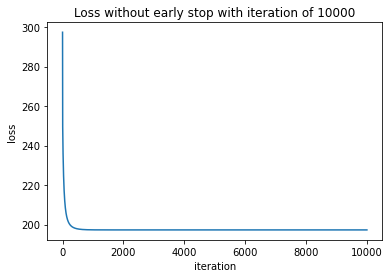

In [132]:
plt.plot(range(num_iter+1), loss_record[2:])
plt.title('Loss without early stop with iteration of 10000')
plt.xlabel('iteration')
plt.ylabel('loss')

### 10000 iterations with 0.0001 learning rate

In [133]:
theta = np.zeros(X_train.shape[1])
alpha = 0.0001
num_iter = 10000
loss_record = [100,10]


for iter in range(num_iter+1):
    h = np.dot(X_train, theta)
    sigmoid = 1 / (1+ (np.exp(-1 * h)))
    error = sigmoid - y_train
    loss = - np.sum((y_train * np.log(sigmoid)) + ((1 - y_train) * np.log(1-sigmoid)))
    average_loss = loss / len(X_train)
    gradient = np.dot(X_train.T, error)
    theta = theta - (alpha * gradient)
    loss_record.append(loss)
    if iter % 500 == 0:
        print(f"{iter}: {loss, average_loss}")

0: (297.36014046021654, 0.6931471805599453)
500: (217.98090626417502, 0.5081140006157926)
1000: (207.48844163744423, 0.4836560411129236)
1500: (203.20381416565658, 0.47366856448871)
2000: (201.0503635674928, 0.46864886612469187)
2500: (199.8213506318375, 0.4657840341068473)
3000: (199.0592385282876, 0.46400754901698743)
3500: (198.55891941758776, 0.46284130400370105)
4000: (198.21689178059358, 0.46204403678460043)
4500: (197.976132253724, 0.4614828257662564)
5000: (197.80300254942446, 0.4610792600219684)
5500: (197.67654167756106, 0.4607844794348743)
6000: (197.5830962232193, 0.460566657862982)
6500: (197.51345025331457, 0.46040431294478923)
7000: (197.4612050424854, 0.4602825292365627)
7500: (197.42181889188743, 0.4601907200277096)
8000: (197.39201285928996, 0.460121242096247)
8500: (197.36938854476165, 0.46006850476634414)
9000: (197.3521739618841, 0.4600283775335294)
9500: (197.33904978715032, 0.4599977850516324)
10000: (197.32902781521904, 0.4599744238116994)


### 10000 iterations with 0.000001 learning rate

In [134]:
theta = np.zeros(X_train.shape[1])
alpha = 0.000001
num_iter = 10000
loss_record = [100,10]


for iter in range(num_iter+1):
    h = np.dot(X_train, theta)
    sigmoid = 1 / (1+ (np.exp(-1 * h)))
    error = sigmoid - y_train
    loss = - np.sum((y_train * np.log(sigmoid)) + ((1 - y_train) * np.log(1-sigmoid)))
    average_loss = loss / len(X_train)
    gradient = np.dot(X_train.T, error)
    theta = theta - (alpha * gradient)
    loss_record.append(loss)
    if iter % 500 == 0:
        print(f"{iter}: {loss, average_loss}")

0: (297.36014046021654, 0.6931471805599453)
500: (282.5957180973802, 0.6587312776162708)
1000: (272.8365384915111, 0.6359826072063195)
1500: (266.2391771726012, 0.6206041425934761)
2000: (261.65217577354485, 0.6099118316399647)
2500: (258.3587049236959, 0.6022347434118785)
3000: (255.90947505771229, 0.5965255828851103)
3500: (254.01969613812815, 0.5921205038184806)
4000: (252.50652230036457, 0.5885932920754419)
4500: (251.25103170792087, 0.5856667405779041)
5000: (250.17490990110898, 0.5831582981377832)
5500: (249.2259727226709, 0.5809463233628692)
6000: (248.3690565851012, 0.5789488498487207)
6500: (247.58020993543803, 0.5771100464695526)
7000: (246.84294324505305, 0.5753914760956947)
7500: (246.1457801632281, 0.573766387326872)
8000: (245.48064172658522, 0.5722159480806183)
8500: (244.841770256316, 0.5707267371942099)
9000: (244.22500664786486, 0.5692890597852328)
9500: (243.62730129789483, 0.5678958072212)
10000: (243.04638082550915, 0.5665416802459421)


### Using different learning rate, we see the one with smallest loss is 0.001
### Let's set threshold to make the model early stop when the diff of loss is no longer larger than threshold

In [135]:
theta = np.zeros(X_train.shape[1])
alpha = 0.001
num_iter = 10000
threshold = 0.0000001
count = 0
loss_record = [100,10]


while (count < num_iter) and  (np.abs(loss_record[-1] - loss_record[-2]) > threshold)   :
    h = np.dot(X_train, theta)
    sigmoid = 1 / (1+ (np.exp(-1 * h)))
    error = sigmoid - y_train
    loss = - np.sum((y_train * np.log(sigmoid)) + ((1 - y_train) * np.log(1-sigmoid)))
    average_loss = loss / len(X_train)
    gradient = np.dot(X_train.T, error)
    theta = theta - (alpha * gradient)
    loss_record.append(loss)
    count += 1

    if count % 100 == 0:
        print(f"{count}: {loss, average_loss}")

100: (207.55724280688617, 0.48381641679926846)
200: (201.0623935927097, 0.46867690814151447)
300: (199.0626240819058, 0.46401544075036316)
400: (198.21796213477364, 0.4620465317826891)
500: (197.80327449209938, 0.4610798939209776)
600: (197.5830760676857, 0.46056661088038625)
700: (197.46109225846567, 0.4602822663367498)
800: (197.39188796083926, 0.46012095095766725)
900: (197.35206612927934, 0.4600281261754763)
1000: (197.32894410451834, 0.45997422868186094)
1100: (197.3154363655053, 0.45994274211073494)
1200: (197.30751084763946, 0.4599242677101153)
1300: (197.3028457067298, 0.45991339325578046)
1400: (197.30009305589883, 0.459906976820277)
1500: (197.29846586525463, 0.4599031838350924)
1600: (197.29750261007132, 0.45990093848501473)
1700: (197.2969317640366, 0.45989960784157713)
1800: (197.29659318255284, 0.45989881860734927)
1900: (197.2963922313534, 0.45989835018963493)
2000: (197.29627290489807, 0.4598980720393894)
2100: (197.29620202031515, 0.45989790680726145)
2200: (197.296159

In [136]:
count

2425

Text(0, 0.5, 'loss')

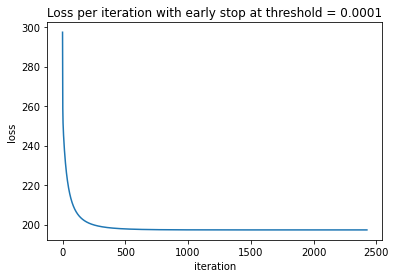

In [137]:
plt.plot(range(count), loss_record[2:])
plt.title('Loss per iteration with early stop at threshold = 0.0001')
plt.xlabel('iteration')
plt.ylabel('loss')

## 6) Test the model accuracy

In [138]:
theta

array([-1.91968075, -0.55583988,  0.88168385,  0.07339114, -0.38870153,
       -0.16949108,  0.00370041, -0.17159702, -0.16219859, -0.10676077,
        3.39507608, -0.01381132])

In [139]:
train_predicted = np.dot(X_train, theta)
train_sigmoid_predicted = 1 / (1+ np.exp(-1 * train_predicted))
train_y_hat = np.round(train_sigmoid_predicted)

In [140]:
train_y_hat

array([1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1.

In [141]:
test_predicted = np.dot(X_test, theta)
test_sigmoid_predicted = 1 / (1+ np.exp(-1 * test_predicted))
test_y_hat = np.round(test_sigmoid_predicted)

In [142]:
test_y_hat

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.])

In [143]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [144]:
print(classification_report(y_true = y_train, y_pred = train_y_hat ))
print("=========")
print(accuracy_score(y_true = y_train, y_pred = train_y_hat ))

              precision    recall  f1-score   support

           0       0.85      0.46      0.60       130
           1       0.80      0.96      0.88       299

    accuracy                           0.81       429
   macro avg       0.82      0.71      0.74       429
weighted avg       0.82      0.81      0.79       429

0.8111888111888111


In [145]:
print(classification_report(y_true = y_test, y_pred = test_y_hat ))
print("=========")
print(accuracy_score(y_true = y_test, y_pred = test_y_hat ))

              precision    recall  f1-score   support

           0       0.90      0.42      0.57        62
           1       0.77      0.98      0.86       123

    accuracy                           0.79       185
   macro avg       0.83      0.70      0.72       185
weighted avg       0.81      0.79      0.76       185

0.7891891891891892


In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

In [147]:
cfm_train = confusion_matrix(y_true = y_train, y_pred = train_y_hat )
cfm_test = confusion_matrix(y_true = y_test, y_pred = test_y_hat )

In [148]:
np.sum(cfm_train)

429

Text(0.5, 24.0, 'Predicted value')

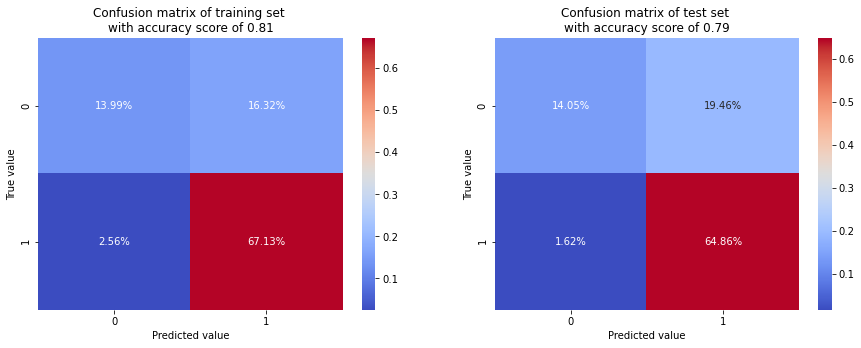

In [149]:
fig, axes = plt.subplots(1,2, figsize = (15,5))

sns.heatmap(cfm_train /np.sum(cfm_train) , cmap = 'coolwarm', annot =True, fmt = ".2%" ,ax = axes[0])
axes[0].set_title(f'Confusion matrix of training set \nwith accuracy score of {np.round(accuracy_score(y_true = y_train, y_pred = train_y_hat ), 2)}')
axes[0].set_ylabel('True value')
axes[0].set_xlabel('Predicted value')

sns.heatmap(cfm_test /np.sum(cfm_test) , cmap = 'coolwarm', annot =True, fmt = ".2%" ,ax = axes[1])
axes[1].set_title(f'Confusion matrix of test set \nwith accuracy score of {np.round(accuracy_score(y_true = y_test, y_pred = test_y_hat ), 2)}')
axes[1].set_ylabel('True value')
axes[1].set_xlabel('Predicted value')

## 7) Predicted on the data_test 

In [150]:
normalized_data_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,-0.705357,0,0,0.028072,-0.497606,-0.454211,0.24768,1.0,2
1,1,1,0.119161,0,0,-0.408783,-0.043469,-0.266922,0.24768,1.0,2
2,1,1,0.943680,0,0,-0.090890,0.047358,0.692930,0.24768,1.0,2
3,1,1,0.943680,0,0,-0.530389,0.273215,-0.571266,0.24768,1.0,2
4,1,0,-0.705357,1,0,-0.375738,-0.497606,-0.828787,0.24768,1.0,2


In [151]:
normalized_data_test_np = np.array(normalized_data_test)

In [152]:
normalized_data_test_np.shape

(367, 11)

In [153]:
normalized_data_test_np = np.insert(normalized_data_test_np, 0,1, axis = 1)

In [154]:
normalized_data_test_np.shape

(367, 12)

In [155]:
predicted = np.dot(normalized_data_test_np, theta)
sigmoid_predicted = 1 / (1+ np.exp(-1 * predicted))
y_hat = np.round(sigmoid_predicted)

In [156]:
y_hat

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1.

---
## 8) Summary from the lab
### On Missing Data Cleaning
- For categorical column with missing values, it will be inserted with each possible value, according to the ratio of that particular value in the training set
- For numerical column with missing values, it will be inserted with the mean value of that feature

### On Data Preparation
- In the dataset, categorical columns have been extracted and then label-encoded with sklearn to make them numerically interpretable
- Then for the numerical columns, normalizaiton with StandardScaler is performed to make it easier for the model to perform
- Actually, I had previously performed the logistic regression on un-normalized data. The error occurred in the np.log

### On Training the data
-  Using logistic regression from scratch, after iterating for 10,000 times with learning rate of 0.01, 0.001, 0.0001, and 0.000001, the smallest loss function is when then learning rate is at 0.01, yielding the loss of ~ 197.296
- Then early stop with the threshold is implemented to reduce the computational power and time. The early stop model with the same learning rate yields almost the same loss funciton and can early stop at only after iterating 2,425 times

### Performance Evaluation
- Using sklearn.metric - classfication_report and accuracy score, accuracy score on the training data is at ~81% and ~79 on the test data
- Using sklearn.metric - confusion matrix, we see that the most of the inaccuracy falls in the 'False Positive' category, where the model predicts the loan status of 'Yes' while it is 'No' in true value 
